In [1]:
# import modules
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# magic constants
SPLIT_PERCENTAGE = 0.2
LABEL_GENERATION = 'inferred' # default, generated from structure
RANDOM_SEED = 42
BATCH_SIZE = 32 # unsure, trade off between performance and efficiency
IMAGE_DIMENSIONS = (256,256) # default, all images must have same size
KERNEL_SIZE = 3
SHUFFLE_FLAG = True # default
EPOCHS = 20

In [3]:
# documentation: www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# have a look at default parameters..
train_ds = keras.utils.image_dataset_from_directory(
    directory='NeuralNetworks/training_data/',
    validation_split=SPLIT_PERCENTAGE,
    labels=LABEL_GENERATION,
    subset='training',
    seed=RANDOM_SEED,
    label_mode='binary', # we do binary classification
    batch_size=BATCH_SIZE,    
    image_size=IMAGE_DIMENSIONS, 
    shuffle=SHUFFLE_FLAG
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory='NeuralNetworks/training_data/',
    validation_split=SPLIT_PERCENTAGE,
    labels=LABEL_GENERATION,
    subset='validation',
    seed=RANDOM_SEED,
    label_mode='binary',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_DIMENSIONS, 
    shuffle=SHUFFLE_FLAG
)

"""
To explicitly use one-hot encoding, use integer labels and add:
train_labels = to_categorical(train_ds.labels)
valid_labels = to_categorical(valid_ds.labels)
Seems unnecessary though with label_mode = 'binary'
"""

Found 2014 files belonging to 2 classes.
Using 1612 files for training.
Found 2014 files belonging to 2 classes.
Using 402 files for validation.


"\nTo explicitly use one-hot encoding, use integer labels and add:\ntrain_labels = to_categorical(train_ds.labels)\nvalid_labels = to_categorical(valid_ds.labels)\nSeems unnecessary though with label_mode = 'binary'\n"

In [4]:
# Setting up the neural network architecture
print(f'using kernel size {KERNEL_SIZE}')
model = keras.Sequential([
    #Ideally, perform the rescaling in a separate preprocessing step..
    keras.layers.experimental.preprocessing.Rescaling(1/255),
    # Hidden layers
    layers.Conv2D(16, KERNEL_SIZE, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, KERNEL_SIZE, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    # Output layer, single neuron
    layers.Dense(1, activation='sigmoid')
])

using kernel size 3


In [5]:
"""
All metrics are added, not sure which ones we are interested in
metrics=['accuracy', precision, 'recall', 'f1', 'AUC']
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
results = model.fit(train_ds, epochs=EPOCHS, validation_data=valid_ds)

Epoch 1/20
51/51 [==============================] - 38s 720ms/step - loss: 1.4329 - accuracy: 0.7153 - val_loss: 0.4129 - val_accuracy: 0.8682
Epoch 2/20
51/51 [==============================] - 29s 570ms/step - loss: 0.2901 - accuracy: 0.9150 - val_loss: 0.4180 - val_accuracy: 0.8632
Epoch 3/20
51/51 [==============================] - 29s 567ms/step - loss: 0.2397 - accuracy: 0.9305 - val_loss: 0.3467 - val_accuracy: 0.8856
Epoch 4/20
51/51 [==============================] - 29s 569ms/step - loss: 0.2264 - accuracy: 0.9380 - val_loss: 0.2760 - val_accuracy: 0.9080
Epoch 5/20
51/51 [==============================] - 29s 566ms/step - loss: 0.1750 - accuracy: 0.9597 - val_loss: 0.3713 - val_accuracy: 0.8781
Epoch 6/20
51/51 [==============================] - 29s 566ms/step - loss: 0.1589 - accuracy: 0.9584 - val_loss: 0.2776 - val_accuracy: 0.9129
Epoch 7/20
51/51 [==============================] - 30s 582ms/step - loss: 0.1230 - accuracy: 0.9752 - val_loss: 0.2850 - val_accuracy: 0.9179

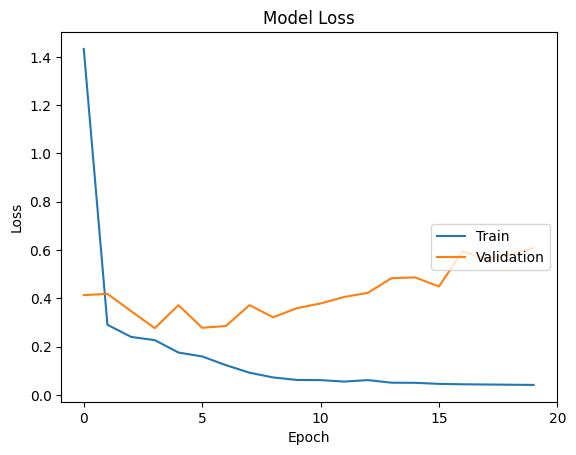

In [6]:
# Plot the training and validation loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(EPOCHS + 1, step=5))
plt.show()